# To-do
# preprocess test data :
 - handling missing value
 - apply same transformation 
# predict and store the results

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [72]:
# Kaggle version
# df = pd.read_csv("/kaggle/input/udacity-mlcharity-competition/census.csv")
# test_df = pd.read_csv("/kaggle/input/udacity-mlcharity-competition/test_census.csv")

# local env version
df = pd.read_csv("udacity-mlcharity-competition/census.csv")
test_df = pd.read_csv("udacity-mlcharity-competition/test_census.csv")

In [3]:
df.head(5)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


# Data Preprocessing
## Explore and Analyze Training Data

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              45222 non-null  int64  
 1   workclass        45222 non-null  object 
 2   education_level  45222 non-null  object 
 3   education-num    45222 non-null  float64
 4   marital-status   45222 non-null  object 
 5   occupation       45222 non-null  object 
 6   relationship     45222 non-null  object 
 7   race             45222 non-null  object 
 8   sex              45222 non-null  object 
 9   capital-gain     45222 non-null  float64
 10  capital-loss     45222 non-null  float64
 11  hours-per-week   45222 non-null  float64
 12  native-country   45222 non-null  object 
 13  income           45222 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


## Handling missing values

In [6]:
# Handling missing values
# Check for missing values
df.isnull().sum()

age                0
workclass          0
education_level    0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

## Checking distributions of features

In [7]:
# Total number of records
n_records = df.shape[0]

# Number of records where individual's income is more than $50,000
n_greater_50k = df[df['income'] == '>50K'].shape[0]

# Number of records where individual's income is at most $50,000
n_at_most_50k = df[df['income'] == '<=50K'].shape[0]

# Percentage of individuals whose income is more than $50,000
greater_percent = round(n_greater_50k/n_records*100, 2)

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


### Imbalanced data: 
there's a **significant disparity** between the two income classes (target calue) within the dataset. Specifically, there are roughly three times as many individuals with incomes of 50,000 or less, when compared to those earning over 50,000. 


we may consider
- involve resamplsing techiques  (oversampling the minority class or undersampling the majority class), 
- using different evaluation metrics that account for imbalances, 
- or considering specialized algorithms tailored for such scenarios ([ref: imbalanced data](https://medium.com/@itbodhi/handling-imbalanced-data-sets-in-machine-learning-5e5f33c70163)).

In [8]:
# Descriptive statistics for numerical features

# Encode the 'income' data to numerical values
df['income'] = df['income'].replace({"<=50K": 0, ">50K": 1})

cat_col = df.select_dtypes(include=['object']).columns
num_col = df.select_dtypes(include=['int64', 'float64']).columns

df.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week,income
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017,0.247844
std,13.217870,2.552881,7506.430084,404.956092,12.007508,0.431766
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000


### Histograms: distributions of numerical variable
<a id="dist_num_var"></a>


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'education-num'}>],
       [<Axes: title={'center': 'capital-gain'}>,
        <Axes: title={'center': 'capital-loss'}>],
       [<Axes: title={'center': 'hours-per-week'}>,
        <Axes: title={'center': 'income'}>]], dtype=object)

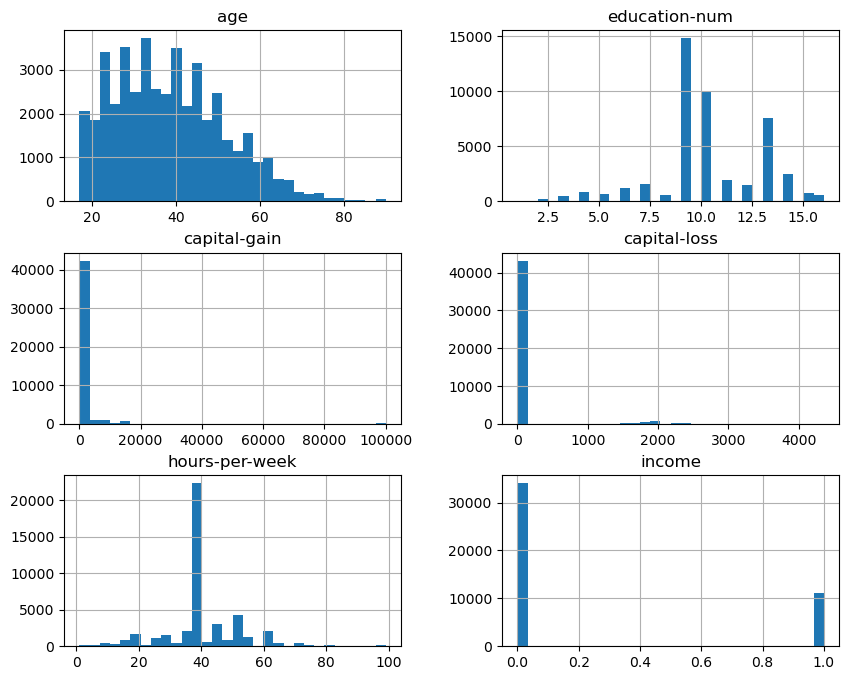

In [9]:
# Histograms: distributions of numerical variable.
df.hist(bins=30, figsize=(10, 8))

### Highly Skewed Featur: `capital-gain` and `capital-loss`
From above Histogram, we can observe highly-skewed feature distributions such as `capital-gain` and `capital-loss`, it is common practice to apply a [logarithmic transformation](https://en.wikipedia.org/wiki/Data_transformation_(statistics)) on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of 0 is undefined, so we must translate the values by a small amount above 0 to apply the the logarithm successfully.


array([[<Axes: title={'center': 'capital-gain'}>,
        <Axes: title={'center': 'capital-loss'}>]], dtype=object)

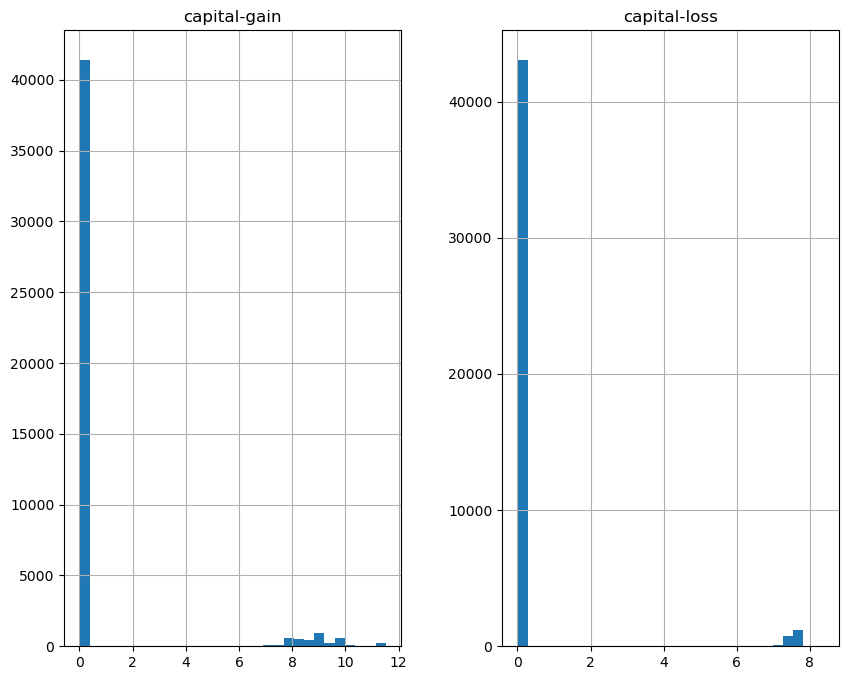

In [10]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = df)
features_log_transformed[skewed] = df[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
features_log_transformed[skewed].hist(bins=30, figsize=(10, 8))

### Moderately right skewed features: `age` 
the square root transformation can help reduce the skew while preserving the relative order and spread of the data.

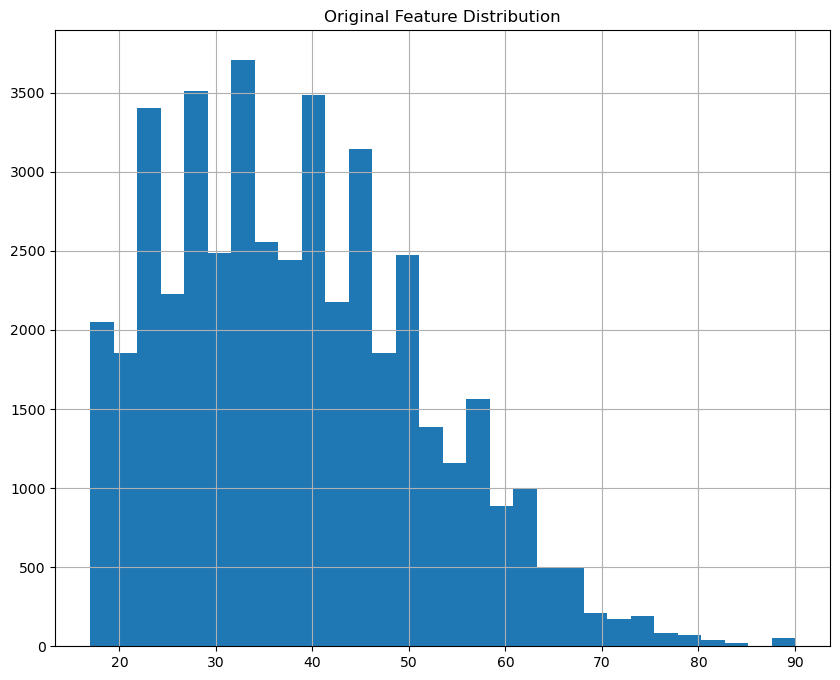

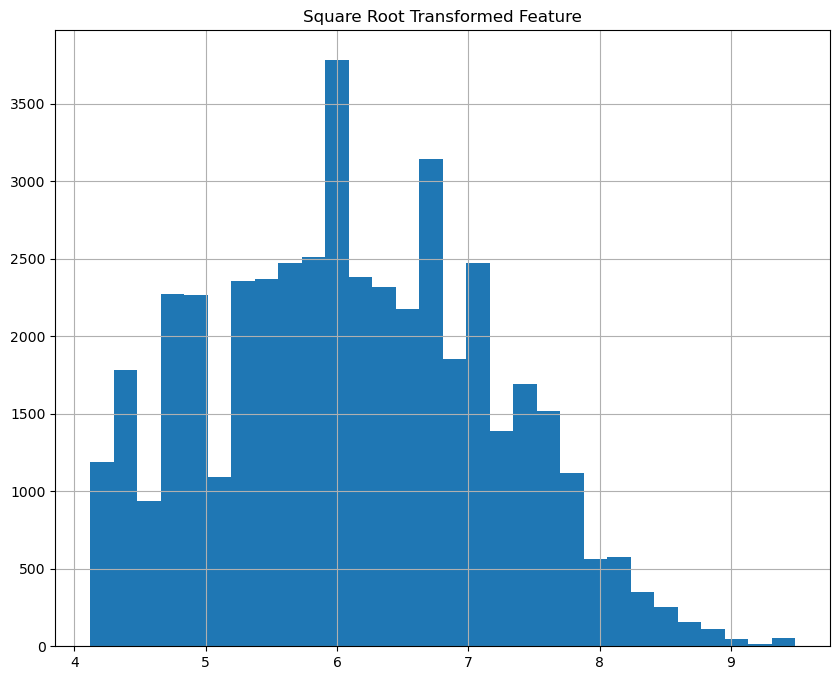

In [11]:
# Log-transform the skewed features
skewed = ['age']
features_sqrt_transformed = pd.DataFrame(data = features_log_transformed)
features_sqrt_transformed[skewed] = np.sqrt(features_sqrt_transformed[skewed])

# Visualize the new log distributions
features_log_transformed[skewed].hist(bins=30, figsize=(10, 8))
plt.title('Original Feature Distribution')
plt.show()
features_sqrt_transformed[skewed].hist(bins=30, figsize=(10, 8))
plt.title('Square Root Transformed Feature')
plt.show()

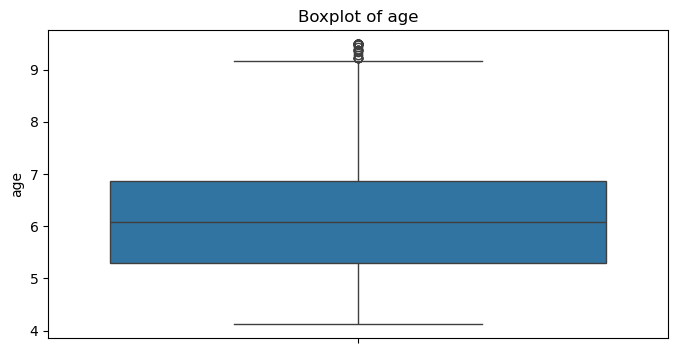

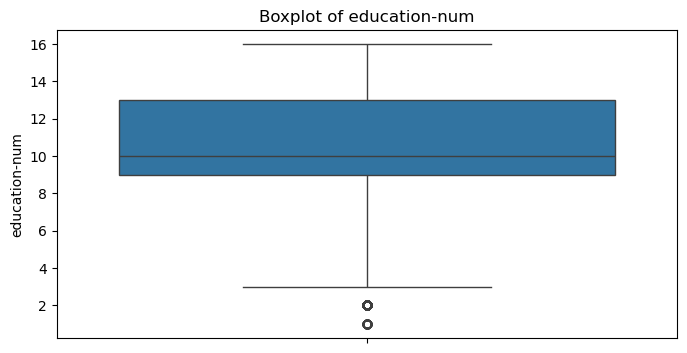

In [12]:
# Box plots: Check for outliers
for col in ['age', 'education-num']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(y=features_sqrt_transformed[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [13]:
def calculate_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers, lower_bound, upper_bound

# Get outliers for age
outliers_age, lower_age, upper_age = calculate_outliers(features_sqrt_transformed['age'])
number_of_outliers_age = outliers_age.count()

# Get outliers for education-num
outliers_education, lower_education, upper_education = calculate_outliers(features_sqrt_transformed['education-num'])
number_of_outliers_education = outliers_education.count()

# Print out the number of outliers
print(f'Number of outliers in age: {number_of_outliers_age}')
print(f'Number of outliers in education-num: {number_of_outliers_education}')
print(f'Number of data record: {features_sqrt_transformed.shape[0]}')
print(f'Portion of outliers in age: {number_of_outliers_age/features_sqrt_transformed.shape[0]}')
print(f'Por of outliers in education-num: {number_of_outliers_education/features_sqrt_transformed.shape[0]}')

Number of outliers in age: 59
Number of outliers in education-num: 294
Number of data record: 45222
Portion of outliers in age: 0.0013046747158462694
Por of outliers in education-num: 0.006501260448454292


### Handle Outliers ([ref](https://blog.paperspace.com/top-4-techniques-for-handling-the-missing-values-in-machine-learning/#2-imputation-techniques)):
1. Remove Outliers: If the outliers are due to errors or are unlikely to provide meaningful insights for the analysis, removing them might make sense.
2. Transform Data: Apply transformations (e.g., log transformation) to reduce the influence of outliers.
3. Data Imputation: Replace outliers with a statistic (mean, median) to reduce their impact without removing them.
4. Keep Them: If they are valid observations that provide valuable information, retain them in the analysis.

With 59 outliers in ```age``` (about 0.13% of 45,222) and 294 outliers in ```education-num ```(about 0.65%), these proportions are relatively small compared to the total dataset. This suggests that they might not heavily influence overall statistical analyses. I will choose to keep them.

<Axes: >

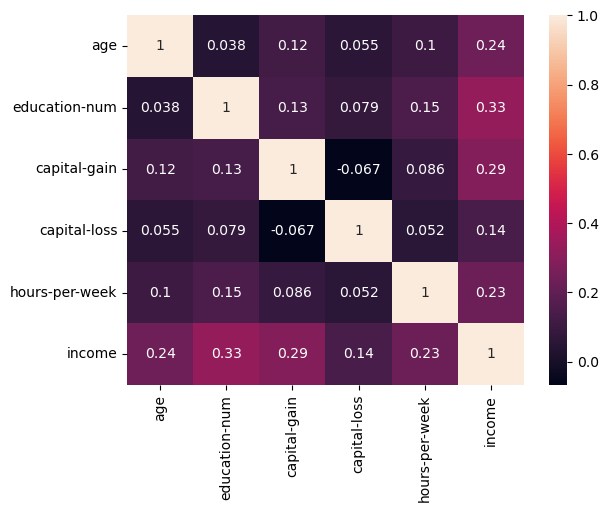

In [14]:
corr_matrix = features_log_transformed[num_col].corr()
sns.heatmap(corr_matrix, annot = True)

In [15]:
# the distribution of categorical vaiables
for col in cat_col:
    print(df[col].value_counts())

workclass
 Private             33307
 Self-emp-not-inc     3796
 Local-gov            3100
 State-gov            1946
 Self-emp-inc         1646
 Federal-gov          1406
 Without-pay            21
Name: count, dtype: int64
education_level
 HS-grad         14783
 Some-college     9899
 Bachelors        7570
 Masters          2514
 Assoc-voc        1959
 11th             1619
 Assoc-acdm       1507
 10th             1223
 7th-8th           823
 Prof-school       785
 9th               676
 12th              577
 Doctorate         544
 5th-6th           449
 1st-4th           222
 Preschool          72
Name: count, dtype: int64
marital-status
 Married-civ-spouse       21055
 Never-married            14598
 Divorced                  6297
 Separated                 1411
 Widowed                   1277
 Married-spouse-absent      552
 Married-AF-spouse           32
Name: count, dtype: int64
occupation
 Craft-repair         6020
 Prof-specialty       6008
 Exec-managerial      5984
 Adm-cle

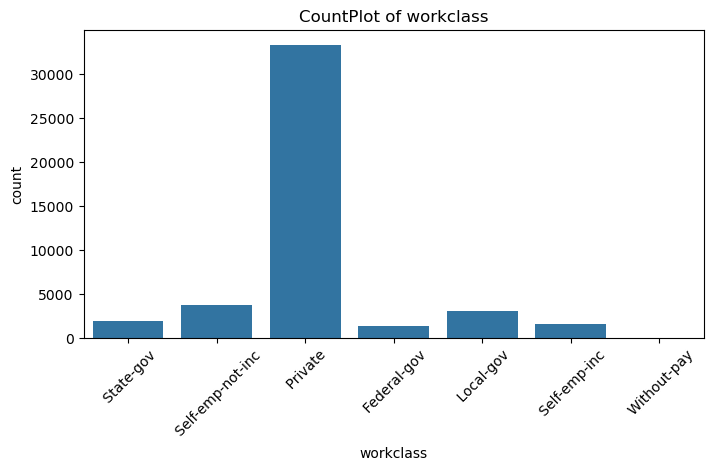

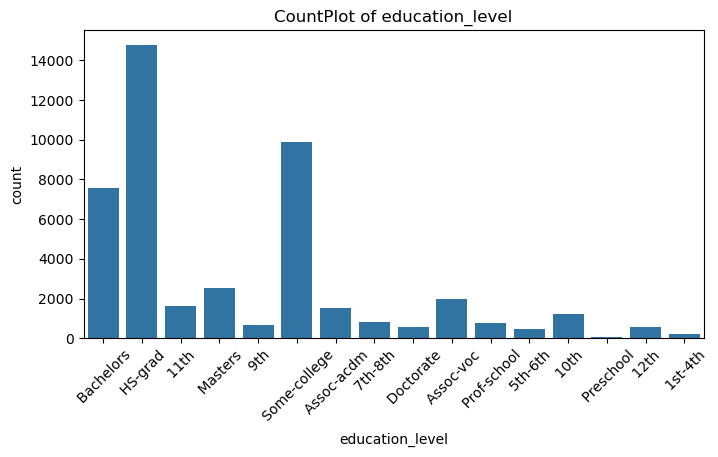

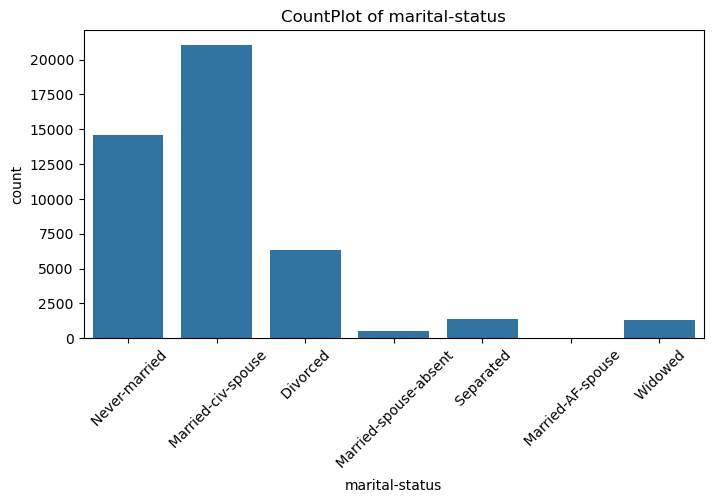

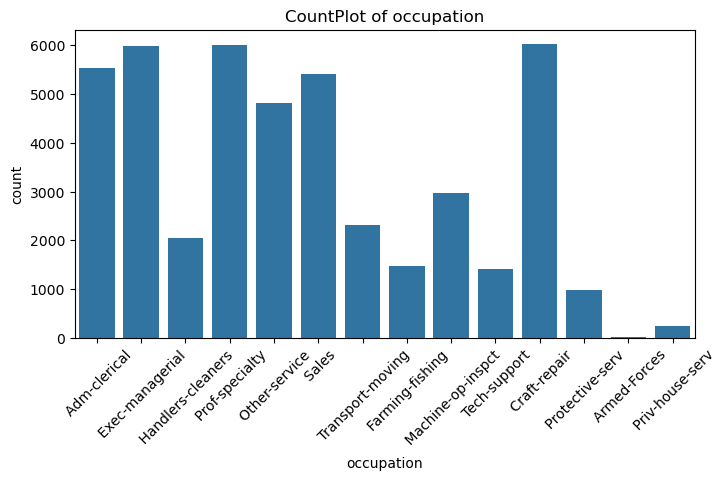

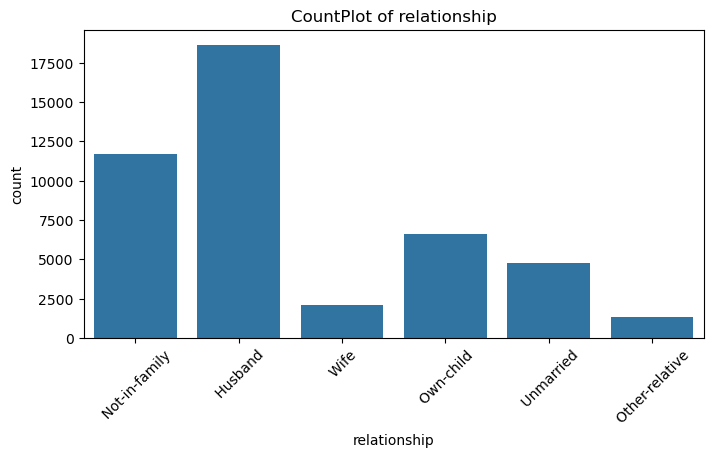

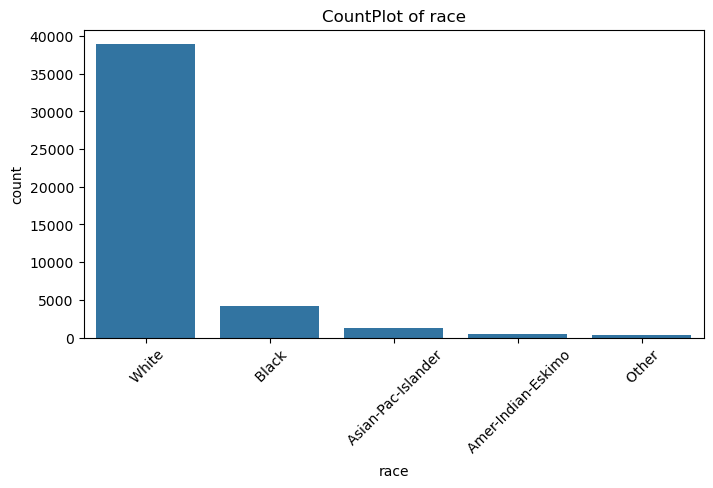

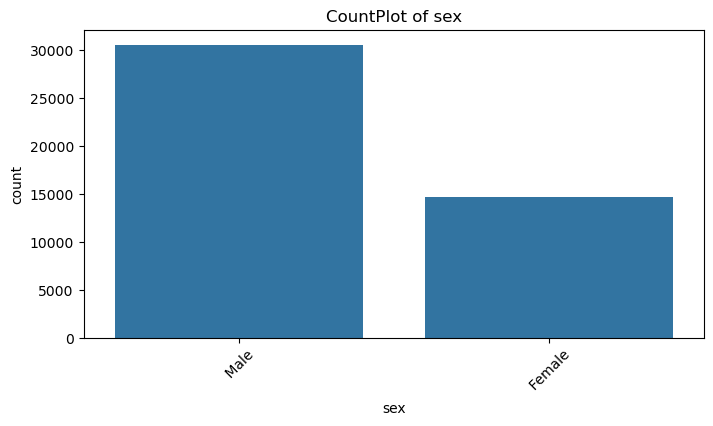

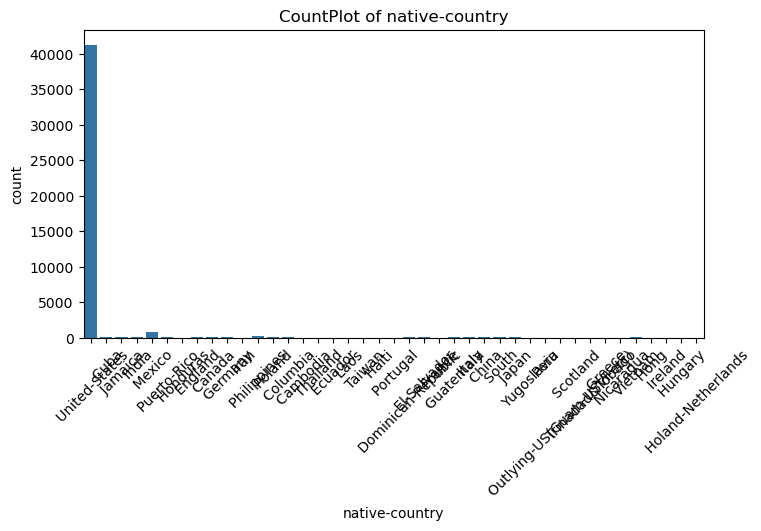

In [16]:
# Visualize categorical distributions
for col in cat_col:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df, orient='h')
    plt.title(f'CountPlot of {col}')
    plt.xticks(rotation=45)
    plt.show()

### Handling Categorical Features ([ref:How to Handle Categorical Features, by Ashutosh Sahu](https://medium.com/analytics-vidhya/how-to-handle-categorical-features-ab65c3cf498e))
1. Drop Feature ```native-country```: ```native-country``` has too many categories and extremely unbalanced, ```race``` is also highly imbalanced. Both of them do not significantly contribute to the model, and may lead to overfitting. I decide to drop it entirely.
2. Freuquency Encoding for ```race``` and ```workclass```: these two features are highly unbalanced, it retain some information about the distribution of categories without introducing too many dimensions (as one-hot encoding would). And it work well with tree-base algorithms.
3. Ordinal Number Encoding for ```education_level```: ```education_level``` is are inherently ordered, I choose to use ordinal encoding instead of one-hot encoding.
4. One Hot Encoding: features with fewer categories (like ```sex```,  ```relationship```, ```marital-status```), one-hot encoding can be directly applied. For feature ```occupation``` I choose to combine low-count categories into a single "Other" category, then apply one-hot encoding.


In [17]:
def handle_cate(data, threshold = 1000):
    
    df = data.copy()
    # drop feature 'native-country'
    df = df.drop('native-country', axis=1)
    
    # Strip whitespace from categorical columns
    for col in cat_col:
        if col in df.columns:
            df[col] = df[col].str.strip()
    
    # Freuquency Encoding for ```race``` and ```workclass```
    race_map = df['race'].value_counts().to_dict()
    df['race'] = df['race'].map(race_map)
    workclass_map = df['workclass'].value_counts().to_dict()
    df['workclass'] = df['workclass'].map(workclass_map)
    
    # Ordinal Number Encoding for education_level
    # Define an ordered list for education levels from lowest to highest
    education_order = [
            'Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', 
            '11th', '12th', 'HS-grad', 'Some-college', 'Assoc-voc', 'Assoc-acdm', 
            'Bachelors', 'Masters', 'Prof-school', 'Doctorate']
    # Map each education level to an ordinal number based on the defined order
    education_map= {level: i for i, level in enumerate(education_order)}
    df['education_level'] = df['education_level'].map(education_map)
    
    # feture: 'occupation' - combine low-frequency ones
    occupation_counts = df['occupation'].value_counts()
    low_freq_occupations = occupation_counts[occupation_counts < threshold].index
    df['occupation'] = df['occupation'].apply(lambda x: 'Other' if x in low_freq_occupations else x)
    
    # One Hot Encoding
    df_encoded = pd.get_dummies(
    df, 
    columns=['sex','occupation', 'relationship', 'marital-status'], 
    prefix=['sex','occupation', 'relationship', 'marital-status'])
    
    bool_col = df_encoded.select_dtypes(include=['bool']).columns
    df_encoded[bool_col] = df_encoded[bool_col].astype(int)
    
    return df_encoded

In [18]:
df_encoded = handle_cate(features_log_transformed)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 36 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   45222 non-null  int64  
 1   workclass                             45222 non-null  int64  
 2   education_level                       45222 non-null  int64  
 3   education-num                         45222 non-null  float64
 4   race                                  45222 non-null  int64  
 5   capital-gain                          45222 non-null  float64
 6   capital-loss                          45222 non-null  float64
 7   hours-per-week                        45222 non-null  float64
 8   income                                45222 non-null  int64  
 9   sex_Female                            45222 non-null  int32  
 10  sex_Male                              45222 non-null  int32  
 11  occupation_Adm-

### Resampling data
The data is imbalanced, we’ll upsample the data so that the minority class matches the majority class.

[0 1]
income
0    34014
1    11208
Name: count, dtype: int64


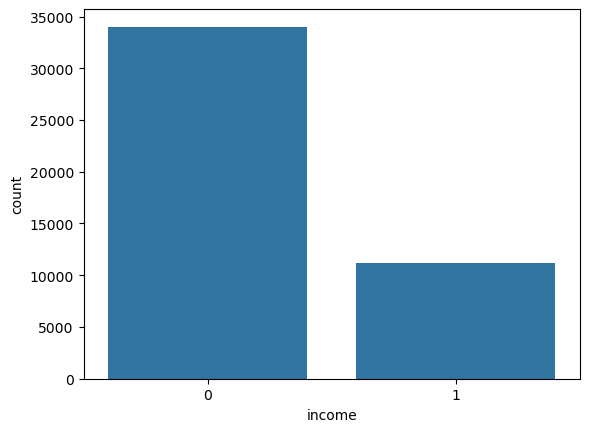

In [19]:
import seaborn as sns
sns.countplot(x='income',data=df_encoded.astype({'income': 'category'}))
print(df_encoded['income'].unique())
print(df_encoded['income'].value_counts())


In [20]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = df_encoded[(df_encoded['income']==0)] 
df_minority = df_encoded[(df_encoded['income']==1)] 

# upsample minority class
n_samples = int(0.75 * len(df_majority))
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= n_samples, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

# Check Class Distribution
print(df_upsampled['income'].value_counts())

income
0    34014
1    25510
Name: count, dtype: int64


## Proprocess Testing Data

In [73]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       45222 non-null  int64  
 1   age              45205 non-null  float64
 2   workclass        45200 non-null  object 
 3   education_level  45202 non-null  object 
 4   education-num    45208 non-null  float64
 5   marital-status   45201 non-null  object 
 6   occupation       45200 non-null  object 
 7   relationship     45206 non-null  object 
 8   race             45203 non-null  object 
 9   sex              45203 non-null  object 
 10  capital-gain     45207 non-null  float64
 11  capital-loss     45205 non-null  float64
 12  hours-per-week   45209 non-null  float64
 13  native-country   45206 non-null  object 
dtypes: float64(5), int64(1), object(8)
memory usage: 4.8+ MB


In [74]:
test_df.head(1)

,Unnamed: 0,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0,21.0,Private,10th,6.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40.0,United-States


In [75]:
test_df = test_df.drop("Unnamed: 0", axis=1)

In [76]:
# Display rows with any NaN values in test_df
test_df_imputed = test_df.copy()
cat_col = test_df_imputed.select_dtypes(include=['object']).columns
num_col = test_df_imputed.select_dtypes(include=['int64', 'float64']).columns

### Imputation startegy for numerical data
To handle missing values in numerical data, I will choose imputation strategies based on the [distribution of each feature in the training set](#dist_num_var):

- age, education-num, capital-gain, and capital-loss are skewed, so I will use **median imputation** for these features. The median is robust to outliers, making it more suitable for skewed data.
- hours-per-week has a fairly normal distribution, so **mean imputation** is appropriate here, as it effectively represents the central tendency in normally distributed data.

In [77]:
test_df_imputed[num_col].isnull().sum()

age               17
education-num     14
capital-gain      15
capital-loss      17
hours-per-week    13
dtype: int64

In [78]:
# Define columns and imputation strategies
median_cols = ['age', 'capital-gain', 'capital-loss','education-num']
mean_cols = ['hours-per-week']

# Apply median imputation
test_df_imputed[median_cols] = test_df_imputed[median_cols].apply(lambda x: x.fillna(np.floor(x.median())))

# Apply mean imputation
test_df_imputed[mean_cols] = test_df_imputed[mean_cols].apply(lambda x: x.fillna(np.floor(x.mean())))


In [79]:
test_df_imputed[num_col].isnull().sum()

age               0
education-num     0
capital-gain      0
capital-loss      0
hours-per-week    0
dtype: int64

### Imputation startegy for categorical data

In [80]:
test_df_imputed[cat_col].isnull().sum()

workclass          22
education_level    20
marital-status     21
occupation         22
relationship       16
race               19
sex                19
native-country     16
dtype: int64

1. **Contextual Imputation for Related Features:**

**marital-status, relationship, and sex**: Since there are logical dependencies between these features, imputing based on these relationships is a reasonable approach. For example:
- If ```relationship``` is Husband, then ```sex``` should likely be Male and ```marital-status``` could be Married-civ-spouse.
  
2. **Mode Imputation for Other Features:**

For categorical features that do not have clear, intuitive relationships (like **workclass, education_level, occupation, race, and native-country**), mode imputation is suitable. 

In [81]:
# Strip whitespace from all string columns
test_df_imputed = test_df_imputed.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [82]:
# Mode Imputation for Other Features
mode_cols = ['workclass', 'education_level',  'occupation', 'race', 'native-country']
for col in mode_cols:
    test_df_imputed[col].fillna(test_df_imputed[col].mode()[0], inplace=True)

In [83]:
test_df_imputed[cat_col].isnull().sum()

workclass           0
education_level     0
marital-status     21
occupation          0
relationship       16
race                0
sex                19
native-country      0
dtype: int64

In [27]:
test_df_imputed[test_df_imputed['marital-status'].isna()]

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
2100,32.0,Private,Some-college,10.0,NaN,Sales,Own-child,White,Male,0.0,1876.0,60.0,United-States
2391,36.0,Private,HS-grad,9.0,NaN,Craft-repair,Husband,White,Male,0.0,0.0,40.0,United-States
4415,26.0,Private,HS-grad,9.0,NaN,Machine-op-inspct,Husband,White,Male,0.0,0.0,45.0,United-States
5169,57.0,Local-gov,HS-grad,9.0,NaN,Transport-moving,Husband,White,Male,0.0,0.0,25.0,United-States
6293,28.0,Private,Some-college,10.0,NaN,Other-service,Not-in-family,Black,Male,0.0,0.0,14.0,United-States
7293,45.0,Private,Bachelors,13.0,NaN,Exec-managerial,Husband,White,Male,0.0,1977.0,60.0,United-States
10971,30.0,Federal-gov,Bachelors,13.0,NaN,Adm-clerical,Husband,White,Male,0.0,0.0,30.0,Japan
11701,34.0,Local-gov,Masters,14.0,NaN,Prof-specialty,Not-in-family,Other,Female,0.0,0.0,40.0,United-States
12246,72.0,Self-emp-inc,Prof-school,15.0,NaN,Prof-specialty,Husband,White,Male,20051.0,0.0,48.0,United-States
15263,33.0,Private,Some-college,10.0,NaN,Adm-clerical,Husband,Black,Male,0.0,0.0,40.0,United-States


In [84]:
# Fill nan value in marital-status

def fillna_marital_status(test_df): 
    df = test_df.copy()
    # Fill 'marital-status' with 'Married-civ-spouse' when 'relationship' is 'husband' or 'wife'
    married_con = (df['relationship'].isin(['Husband', 'Wife'])) & (df['marital-status'].isna())
    df.loc[married_con, 'marital-status'] = 'Married-civ-spouse'
    
    # Fill 'marital-status' with specific most frequent value when 'relationship' is 'Not-in-family', 'Own-child', 'Unmarried'
    for rela in ['Not-in-family', 'Own-child', 'Unmarried']:
        married_con = (df['relationship'] == rela) & (df['marital-status'].isna())
        most_frequent_marital_status = df.loc[df['relationship'] == rela, 'marital-status'].value_counts().idxmax()
        df.loc[married_con, 'marital-status'] = most_frequent_marital_status

    return df

In [85]:
test_df_imputed = fillna_marital_status(test_df_imputed)
test = test_df_imputed[test_df_imputed['marital-status'].isna()]
print(test.shape[0])
print(test_df_imputed['marital-status'].value_counts())

0
marital-status
Married-civ-spouse       21055
Never-married            14599
Divorced                  6297
Separated                 1411
Widowed                   1276
Married-spouse-absent      552
Married-AF-spouse           32
Name: count, dtype: int64


In [86]:
test_df_imputed[test_df_imputed['sex'].isna()]

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
3899,19.0,Private,HS-grad,9.0,Never-married,Other-service,Own-child,Black,NaN,0.0,0.0,40.0,United-States
3929,26.0,State-gov,Bachelors,13.0,Married-civ-spouse,Adm-clerical,Husband,White,NaN,3942.0,0.0,7.0,United-States
4642,53.0,Self-emp-inc,Masters,14.0,Married-civ-spouse,Sales,Husband,White,NaN,0.0,0.0,65.0,United-States
12084,24.0,Private,Bachelors,13.0,Married-civ-spouse,Sales,Husband,Black,NaN,0.0,0.0,30.0,United-States
13256,45.0,Private,HS-grad,9.0,Married-civ-spouse,Handlers-cleaners,Husband,White,NaN,0.0,1628.0,45.0,United-States
15500,24.0,Private,Assoc-acdm,12.0,Never-married,Handlers-cleaners,Own-child,White,NaN,0.0,0.0,30.0,United-States
16010,56.0,Self-emp-not-inc,1st-4th,2.0,Never-married,Exec-managerial,Not-in-family,Amer-Indian-Eskimo,NaN,0.0,0.0,65.0,United-States
16054,33.0,Private,Doctorate,16.0,Married-civ-spouse,Tech-support,Husband,Asian-Pac-Islander,NaN,0.0,0.0,40.0,Japan
16310,40.0,Local-gov,HS-grad,9.0,Married-civ-spouse,Other-service,Other-relative,White,NaN,3137.0,0.0,40.0,United-States
18377,45.0,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Sales,Husband,White,NaN,2829.0,0.0,60.0,United-States


In [89]:
def fillna_sex(test_df):
    df = test_df.copy()
    # Fill nan value in sex, regarding relationship
    sex_con = (df['relationship'] == 'Husband') & (df['sex'].isna())
    df.loc[sex_con, 'sex'] = 'Male'
    
    sex_con = (df['relationship'] == 'Wife') & (df['sex'].isna())
    df.loc[sex_con, 'sex'] = 'Female'
    
    # Fill 'sex' with specific most frequent value when 'relationship' is 'Not-in-family', 'Own-child', 'Unmarried', 'Other-relative'
    for rela in ['Not-in-family', 'Own-child', 'Unmarried', 'Other-relative']:
        married_con = (df['relationship'] == rela) & (df['sex'].isna())
        most_frequent_marital_status = df.loc[df['relationship'] == rela, 'sex'].value_counts().idxmax()
        df.loc[married_con, 'sex'] = most_frequent_marital_status

    return df

In [90]:
test_df_imputed = fillna_sex(test_df_imputed)
test = test_df_imputed[test_df_imputed['sex'].isna()]
print(test.shape[0])
print(test_df_imputed['sex'].value_counts())

0
sex
Male      30529
Female    14693
Name: count, dtype: int64


In [91]:
test_df_imputed[test_df_imputed['relationship'].isna()]

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
590,38.0,Local-gov,HS-grad,9.0,Married-civ-spouse,Protective-serv,NaN,White,Male,0.0,0.0,40.0,United-States
7543,38.0,Private,Assoc-voc,11.0,Never-married,Craft-repair,NaN,White,Female,0.0,0.0,40.0,Portugal
7743,41.0,Private,HS-grad,9.0,Married-civ-spouse,Craft-repair,NaN,White,Male,0.0,0.0,40.0,United-States
7881,27.0,Self-emp-inc,HS-grad,9.0,Never-married,Exec-managerial,NaN,White,Male,0.0,0.0,50.0,United-States
16506,28.0,Private,Bachelors,13.0,Married-civ-spouse,Other-service,NaN,White,Female,0.0,0.0,35.0,United-States
18306,43.0,Private,Some-college,10.0,Married-civ-spouse,Sales,NaN,White,Male,0.0,0.0,43.0,United-States
18801,23.0,Private,Bachelors,13.0,Never-married,Sales,NaN,White,Female,0.0,0.0,40.0,United-States
23207,39.0,Private,Some-college,10.0,Married-civ-spouse,Exec-managerial,NaN,White,Male,0.0,0.0,40.0,United-States
25564,58.0,Local-gov,Bachelors,13.0,Never-married,Prof-specialty,NaN,White,Female,0.0,0.0,37.0,United-States
37132,41.0,Self-emp-not-inc,Masters,14.0,Never-married,Exec-managerial,NaN,Asian-Pac-Islander,Male,0.0,0.0,45.0,United-States


In [98]:
def fillna_relationship(test_df):
    df = test_df.copy()
    # fill 'relationship' regarding 'marital-status' and 'sex'
    mask = (df['marital-status'] == 'Married-civ-spouse') & (df['sex'] == 'Male')
    df.loc[mask, 'relationship'] = 'Husband'
    mask = (df['marital-status'] == 'Married-civ-spouse') & (df['sex'] == 'Female')
    df.loc[mask, 'relationship'] = 'Wife'
    
    # fill 'relationship' regarding 'marital-status' 
    for x in ['Never-married', 'Divorced']:
        mask = (df['marital-status'] == x) & (df['relationship'].isna())
        most_frequent_marital_status = df.loc[df['marital-status'] == x, 'relationship'].value_counts().idxmax()
        df.loc[mask, 'relationship'] = most_frequent_marital_status
        
    return df

In [100]:
test_df_imputed = fillna_relationship(test_df_imputed)
test = test_df_imputed[test_df_imputed['relationship'].isna()]

print(test_df_imputed['relationship'].value_counts())
print(test.shape[0])

relationship
Husband           18853
Not-in-family     11685
Own-child          6499
Unmarried          4788
Wife               2232
Other-relative     1165
Name: count, dtype: int64
0


In [101]:
test_df_imputed.isna().sum()

age                0
workclass          0
education_level    0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
dtype: int64

## Apply same transformation on test data

# Shuffle and Split Training Data

In [38]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
income = df_upsampled['income']
features_final = df_upsampled.drop('income', axis=1)
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 47619 samples.
Testing set has 11905 samples.


## Naive Predictor Performance
Assuming a model always predicts 1 (i.e., the individual makes more than 50k) to obseve the performance without any intelligence would look like.

In [39]:
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

# Calculate accuracy, precision and recall
accuracy = TP / (TP + FP + TN + FN)
recall = TP / (TP + FN)   # = 1, as FN = 0
precision = TP / (TP + FP) 

# Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
fscore = 1.25 * precision * recall / (0.25*precision + recall)

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))
print("Naive Predictor: [Recall score: {:.4f},  Precision score: {:.4f}]".format(recall, precision))

Naive Predictor: [Accuracy score: 0.4286, F-score: 0.4839]
Naive Predictor: [Recall score: 1.0000,  Precision score: 0.4286]


# Evaluating Model Performance

## Use GaussianNB as benchmark
GaussianNB is a good choice as benchmark, since it doesn't require tuning and can reach decent results even if features are not fully independent.

In [40]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import fbeta_score, accuracy_score

clf = GaussianNB()
clf.fit(X_train, y_train)

result_train = clf.predict(X_train)
result_test = clf.predict(X_test)

acc_train =  accuracy_score(y_train, result_train)
acc_test =  accuracy_score(y_test, result_test)

fscore_train =  fbeta_score(y_train, result_train, beta=0.5)
fscore_test =  fbeta_score(y_test, result_test, beta=0.5)

print("GaussianNB on train set: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(acc_train, fscore_train))
print("GaussianNB on test set: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(acc_test, fscore_test))

GaussianNB on train set: [Accuracy score: 0.7836, F-score: 0.7302]
GaussianNB on test set: [Accuracy score: 0.7833, F-score: 0.7275]


## Supervised Learning Models


In [41]:
# Creating a Training and Predicting Pipeline
from sklearn.metrics import fbeta_score, accuracy_score
from time import time

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    #  Calculate the training time
    results['train_time'] = end - start
        
    # Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
            
    # Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5)
        
    # Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
       
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
    
    return results

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

random = 42 # for reproduce of the result

# Initialize models
models = [
    ("Logistic Regression", LogisticRegression(random_state=random)),
    ("Random Forest", RandomForestClassifier(random_state=random)),
    ("AdaBoost", AdaBoostClassifier(random_state=random)),
    ("Decision Tree", DecisionTreeClassifier(random_state=random))
]

# Calculate the number of samples for 1%, 10%, and 100% of the training data
samples = len(y_train)
sample_sizes = [int(0.01*samples), int(0.1*samples), samples]

# Collect results on the learners
results = {}
for model_name, model in models:
    results[model_name] = []
    for sample_size in sample_sizes:
        result = train_predict(model, sample_size, X_train, y_train, X_test, y_test)
        results[model_name].append(result)

E:\Anaconda\envs\env-ids-ws23\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\Anaconda\envs\env-ids-ws23\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

LogisticRegression trained on 476 samples.
LogisticRegression trained on 4761 samples.


E:\Anaconda\envs\env-ids-ws23\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression trained on 47619 samples.
RandomForestClassifier trained on 476 samples.
RandomForestClassifier trained on 4761 samples.
RandomForestClassifier trained on 47619 samples.


E:\Anaconda\envs\env-ids-ws23\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier trained on 476 samples.


E:\Anaconda\envs\env-ids-ws23\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier trained on 4761 samples.


E:\Anaconda\envs\env-ids-ws23\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier trained on 47619 samples.
DecisionTreeClassifier trained on 476 samples.
DecisionTreeClassifier trained on 4761 samples.
DecisionTreeClassifier trained on 47619 samples.


In [43]:
# Transform results dictionary into a DataFrame
performance_df = pd.DataFrame([
    {"Model": model_name, "Sample Size": sample_size,
     "Train Time": result["train_time"], "Predict Time": result["pred_time"],
     "Training Accuracy": result["acc_train"], "Test Accuracy": result["acc_test"],
     "Training F-Score": result["f_train"], "Test F-Score": result["f_test"]}
    for model_name, results_list in results.items()
    for sample_size, result in zip(sample_sizes, results_list)
])

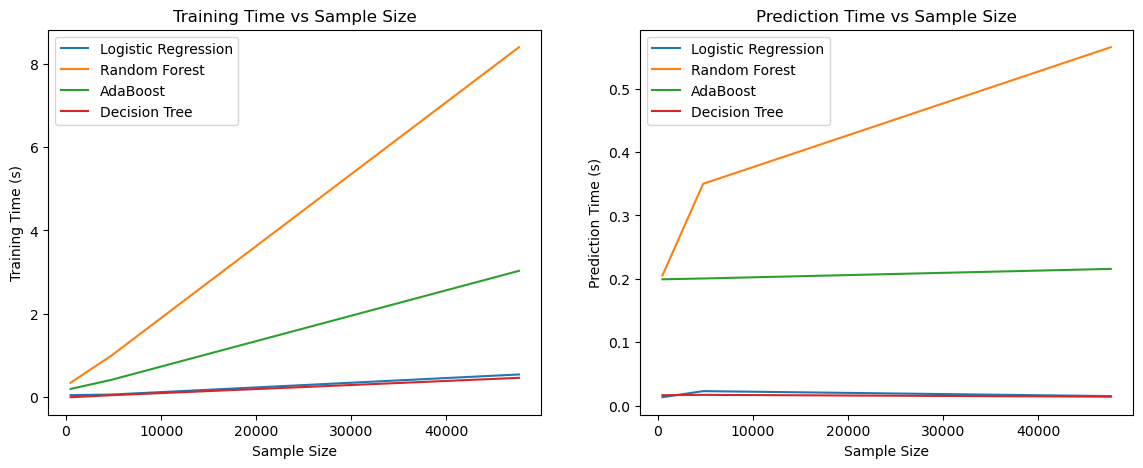

In [44]:
# Visualize Training and Prediction Times
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plot Training Time
for model in performance_df["Model"].unique():
    df = performance_df[performance_df["Model"] == model]
    ax[0].plot(df["Sample Size"], df["Train Time"], label=model)

ax[0].set_title("Training Time vs Sample Size")
ax[0].set_xlabel("Sample Size")
ax[0].set_ylabel("Training Time (s)")
ax[0].legend()

# Plot Prediction Time
for model in performance_df["Model"].unique():
    df = performance_df[performance_df["Model"] == model]
    ax[1].plot(df["Sample Size"], df["Predict Time"], label=model)

ax[1].set_title("Prediction Time vs Sample Size")
ax[1].set_xlabel("Sample Size")
ax[1].set_ylabel("Prediction Time (s)")
ax[1].legend()

plt.show()


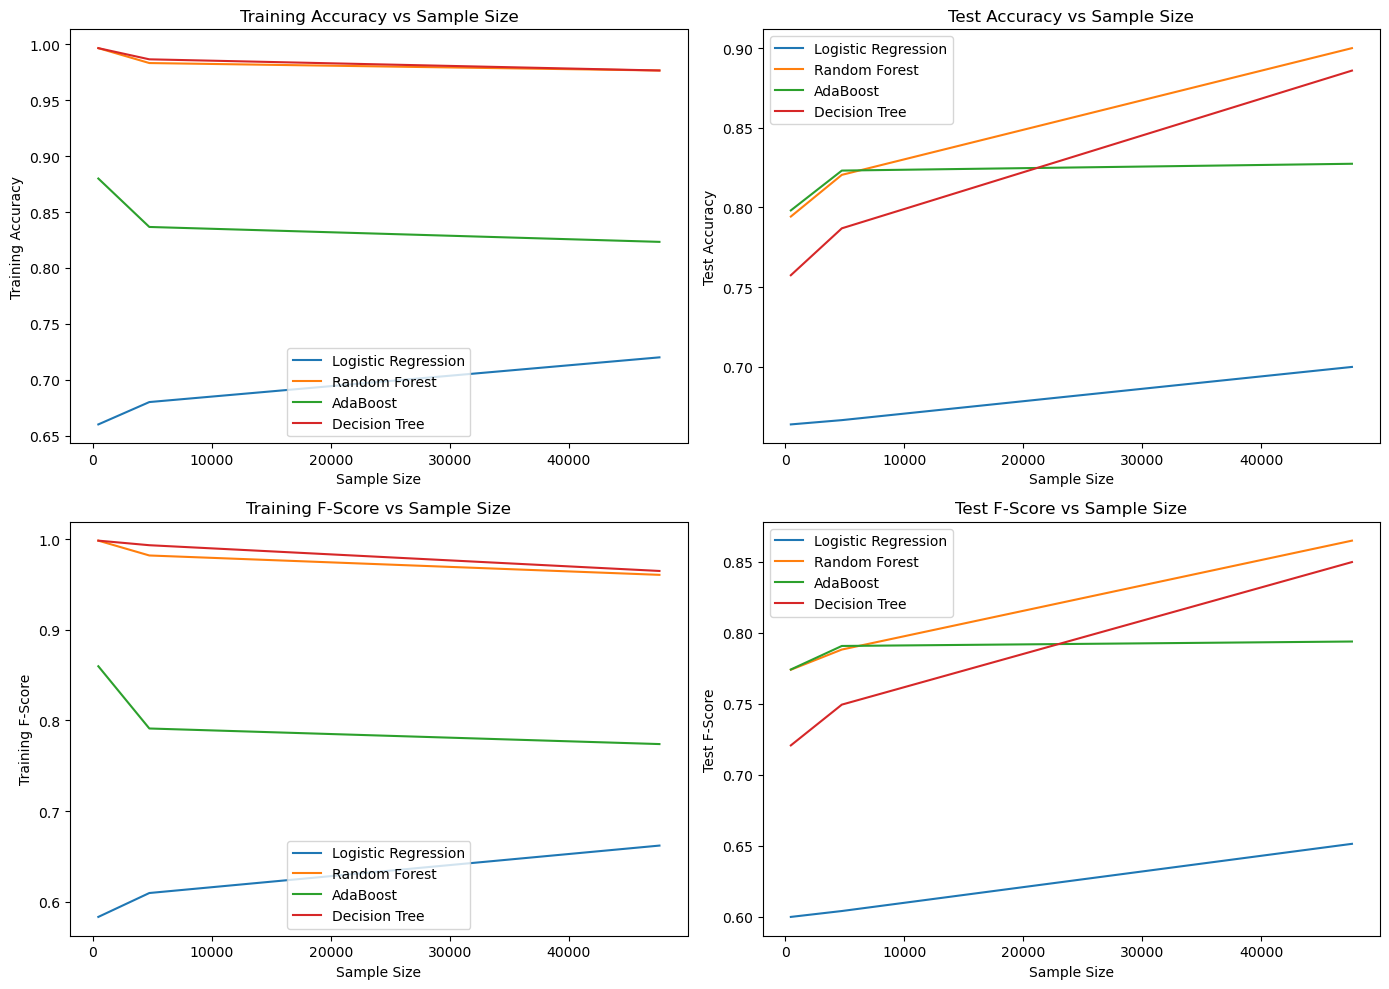

In [45]:
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Plot Training Accuracy
for model in performance_df["Model"].unique():
    df = performance_df[performance_df["Model"] == model]
    ax[0, 0].plot(df["Sample Size"], df["Training Accuracy"], label=model)

ax[0, 0].set_title("Training Accuracy vs Sample Size")
ax[0, 0].set_xlabel("Sample Size")
ax[0, 0].set_ylabel("Training Accuracy")
ax[0, 0].legend()

# Plot Test Accuracy
for model in performance_df["Model"].unique():
    df = performance_df[performance_df["Model"] == model]
    ax[0, 1].plot(df["Sample Size"], df["Test Accuracy"], label=model)

ax[0, 1].set_title("Test Accuracy vs Sample Size")
ax[0, 1].set_xlabel("Sample Size")
ax[0, 1].set_ylabel("Test Accuracy")
ax[0, 1].legend()

# Plot Training F-Score
for model in performance_df["Model"].unique():
    df = performance_df[performance_df["Model"] == model]
    ax[1, 0].plot(df["Sample Size"], df["Training F-Score"], label=model)

ax[1, 0].set_title("Training F-Score vs Sample Size")
ax[1, 0].set_xlabel("Sample Size")
ax[1, 0].set_ylabel("Training F-Score")
ax[1, 0].legend()

# Plot Test F-Score
for model in performance_df["Model"].unique():
    df = performance_df[performance_df["Model"] == model]
    ax[1, 1].plot(df["Sample Size"], df["Test F-Score"], label=model)

ax[1, 1].set_title("Test F-Score vs Sample Size")
ax[1, 1].set_xlabel("Sample Size")
ax[1, 1].set_ylabel("Test F-Score")
ax[1, 1].legend()

plt.tight_layout()
plt.show()


## Analysis: the choice of model - Adaboost
Among four models, _Logistic Regression_ shows the worst performance (the lowest accuracy and F-score on both training and test sets). \
_Random Forest_ and _Decision Tress_ shows very high training accuracy and F-score (close to 100%) across all sample sizes, but there’s a noticeable drop in test accuracy and F-score. This gap between training and test performance indicates **overfitting**. AdaBoost has more consistent scores across training and test sets. For larger sample sizes, the training and test accuracies and F-scores are close (e.g., 82% training accuracy vs. 82% test accuracy at the largest sample size). This suggests that AdaBoost is not overfitting as much as Random Forest, since it **generalizes better** on the test data.\
I decide to choose **Adaboost** as training model, because of its stable performance, minimal overfitting, and requiring less training and prediction time than random forest.

# Model Tuning

result of Randome Search:
```
Best Parameters from Random Search: {'n_estimators': 309, 'learning_rate': 0.9548962120268581, 'estimator': DecisionTreeClassifier(max_depth=3)}
Best F-Score from Random Search: 0.8185190071752853

Best Parameters from Random Search: {'n_estimators': 448, 'learning_rate': 0.8514527484442095, 'estimator': DecisionTreeClassifier(max_depth=3)}
Best F-Score from Random Search: 0.8222358850740925

Best Parameters from Random Search: {'n_estimators': 354, 'learning_rate': 0.6688992123139906, 'estimator': DecisionTreeClassifier(max_depth=3)}
Best F-Score from Random Search: 0.8216574629568839
```

### GridSearch Result
```
Unoptimized model
------
Accuracy score on testing data: 0.8275
F-score on testing data: 0.7938

Optimized Model
------
Best Parameters from Random Search: {'algorithm': 'SAMME', 'estimator': DecisionTreeClassifier(max_depth=3), 'learning_rate': 1.2, 'n_estimators': 300}
Final accuracy score on the testing data: 0.8381
Final F-score on the testing data: 0ut 0.1). 

In [46]:
# original model and  Best model's performnace on test data
clf = AdaBoostClassifier(random_state=random)
best_clf = AdaBoostClassifier(algorithm = 'SAMME', 
                              estimator = DecisionTreeClassifier(max_depth=3), 
                              learning_rate = 1.2, 
                              n_estimators = 300, 
                              random_state = random)

# Make predictions using the unoptimized and model
clf.fit(X_train, y_train)
best_clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
best_predictions = best_clf.predict(X_test)

print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

E:\Anaconda\envs\env-ids-ws23\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Unoptimized model
------
Accuracy score on testing data: 0.8275
F-score on testing data: 0.7938

Optimized Model
------
Final accuracy score on the testing data: 0.8381
Final F-score on the testing data: 0.8090


After tuning parameters both accuracy and F-score of Adaboost model increase. The increment of accuracy is slightly less than 0.1, while F-score is more than 0.15. 